<a href="https://colab.research.google.com/github/iamugurduman/iamugurduman/blob/main/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # kaggle.json dosyasını buradan yükleyin

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"uurduman","key":"9d359bf7912dd46dda1ac6771e8bf867"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 14.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Kaggle API ile veri setini indirme
!kaggle datasets download -d slavkoprytula/aquarium-data-cots


Dataset URL: https://www.kaggle.com/datasets/slavkoprytula/aquarium-data-cots
License(s): CC0-1.0
 96% 64.0M/66.6M [00:03<00:00, 27.9MB/s]
100% 66.6M/66.6M [00:03<00:00, 19.3MB/s]


In [ ]:
import zipfile
import os

# ZIP dosyasını çıkarma
zip_path = "aquarium-data-cots.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("aquarium_data")


In [ ]:
import os

# Çıkarılan dosyaları listeleme
data_dir = "aquarium_data"
print(os.listdir(data_dir))


['aquarium_pretrain']


In [ ]:
print(sample_image_path)
print(os.path.exists(sample_image_path))


aquarium_data/images/example_image.jpg
False


In [ ]:
print(os.listdir("aquarium_data"))


['aquarium_pretrain']


In [ ]:
print(os.listdir("aquarium_data/aquarium_pretrain"))


['train', 'README.roboflow.txt', 'data.yaml', 'valid', 'test', 'README.dataset.txt']


In [ ]:
with open("aquarium_data/aquarium_pretrain/data.yaml", 'r') as file:
    print(file.read())


train: ../train/images
val: ../valid/images

nc: 7
names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']


In [ ]:
import os

# Eğitim klasörünü kontrol et
print("Train klasörü:", os.listdir("aquarium_data/aquarium_pretrain/train"))

# Doğrulama klasörünü kontrol et
print("Valid klasörü:", os.listdir("aquarium_data/aquarium_pretrain/valid"))



Train klasörü: ['labels', 'images']
Valid klasörü: ['labels', 'images']


In [ ]:
print("Eğitim görüntüleri:", os.listdir("aquarium_data/aquarium_pretrain/train/images"))


Eğitim görüntüleri: ['IMG_8494_jpg.rf.a68f75721ae7ee1a6bf2caa88aab6cc1.jpg', 'IMG_2370_jpeg_jpg.rf.d5bdf9d889fa01a687af0038c3ede236.jpg', 'IMG_8451_jpg.rf.d7a20105b0a3945b7ea1c5a146adfe0c.jpg', 'IMG_2620_jpeg_jpg.rf.b40034c707395cdd72e600eec10cf362.jpg', 'IMG_2545_jpeg_jpg.rf.be6ed99fa1fb8d17c5d54d7f09cc5d89.jpg', 'IMG_3187_jpeg_jpg.rf.78bcf0210ca5e1fc46e9104fc27d60f7.jpg', 'IMG_2571_jpeg_jpg.rf.d26821c850b04ab5dc79a9b1fdcbea2b.jpg', 'IMG_2587_jpeg_jpg.rf.c0f1bbe427c9f29eaf89fed6f6d03471.jpg', 'IMG_2515_jpeg_jpg.rf.c7255981abc23128903ac9ece1b4d8b5.jpg', 'IMG_8405_jpg.rf.23d15e081e0f47fad6b27f18025e3774.jpg', 'IMG_2604_jpeg_jpg.rf.993c6667a03fd897ea35c645df9ee93d.jpg', 'IMG_8419_jpg.rf.ddef2ce9cf39b86e6937937c5d31f178.jpg', 'IMG_2606_jpeg_jpg.rf.27e5a373d43d2535a923e1089bf60051.jpg', 'IMG_2435_jpeg_jpg.rf.90d0f2a9a2603d0d00e44c54ea34d8a1.jpg', 'IMG_2608_jpeg_jpg.rf.9ba9cc2485112df87a73dee448aad2bc.jpg', 'IMG_2503_jpeg_jpg.rf.726342a02d92d30abc147f6e71fe3baf.jpg', 'IMG_2640_jpeg_jpg.rf.3

In [ ]:
print("Eğitim etiketleri:", os.listdir("aquarium_data/aquarium_pretrain/train/labels"))


Eğitim etiketleri: ['IMG_2324_jpeg_jpg.rf.1f5efa1adc71c46d5037bdcd281056b9.txt', 'IMG_2306_jpeg_jpg.rf.9bba6ce48724517b19474b85178391c1.txt', 'IMG_2554_jpeg_jpg.rf.1ac30f27b030d31a31ec6b2ecdcb9025.txt', 'IMG_8327_jpg.rf.b859bdc46f8f4aaf4d1ff2b902e276df.txt', 'IMG_2292_jpeg_jpg.rf.122a0051d4d65d8651089a2ebbc2ed85.txt', 'IMG_2506_jpeg_jpg.rf.5b0e0ae2d8038056ce3a19b260b9ed55.txt', 'IMG_2362_jpeg_jpg.rf.a1ac6ab5801ffa496d0fbd6038ebf034.txt', 'IMG_2410_jpeg_jpg.rf.28e599148c43192990cc399a4940f016.txt', 'IMG_2628_jpeg_jpg.rf.c607a4280b054d5a636f5ee3398b886d.txt', 'IMG_2328_jpeg_jpg.rf.ee3309e0a5ab09d96d9ed30bc1c1115f.txt', 'IMG_8593_MOV-2_jpg.rf.e9995795a521680a6f70f03810142d58.txt', 'IMG_2463_jpeg_jpg.rf.da774058e67ba22ec38a84ac948b4014.txt', 'IMG_2641_jpeg_jpg.rf.3fc4fead3495733a8298ef199058794b.txt', 'IMG_3177_jpeg_jpg.rf.21ff231136bee6d8d2d88475c2ca47ce.txt', 'IMG_8512_MOV-6_jpg.rf.02aa66e66ae9d7a5756bd29399a39936.txt', 'IMG_2518_jpeg_jpg.rf.5f4e0d8f980eaa632ff94853995eff9e.txt', 'IMG_84

In [ ]:
print("Doğrulama görüntüleri:", os.listdir("aquarium_data/aquarium_pretrain/valid/images"))


Doğrulama görüntüleri: ['IMG_2519_jpeg_jpg.rf.1eafac87483bd91a226e3da2c6c9d914.jpg', 'IMG_2492_jpeg_jpg.rf.7fdeedc3c5005ba50a3295f08f0b54d5.jpg', 'IMG_2404_jpeg_jpg.rf.62c50bcc4cc361b1356dd080a94d25c2.jpg', 'IMG_2392_jpeg_jpg.rf.cd976c440775ded33b2b0d6046f3d627.jpg', 'IMG_3153_jpeg_jpg.rf.bdb07feac6c2d6aaee9831d586876a82.jpg', 'IMG_2366_jpeg_jpg.rf.62cf14267a26c941f480aedda57d14d2.jpg', 'IMG_8591_MOV-1_jpg.rf.a93070247a5bd3fae05926c0514b1b4c.jpg', 'IMG_2325_jpeg_jpg.rf.a8ebf587a5ae7d2f8c58f977583e344c.jpg', 'IMG_8593_MOV-1_jpg.rf.9aa3076a6322416b5ce1c892d97a102a.jpg', 'IMG_2342_jpeg_jpg.rf.f36e481b4e01c2e76e0b27e494682873.jpg', 'IMG_2334_jpeg_jpg.rf.b545bdad952bf47fbadb8ee504e52c36.jpg', 'IMG_2442_jpeg_jpg.rf.a0f2dc8165d94438935847bb4c9fa2d6.jpg', 'IMG_2388_jpeg_jpg.rf.2ecbbaf2de399755ab51d3394ed79737.jpg', 'IMG_8512_MOV-5_jpg.rf.417fc7eb3489c16db7ed1f6a63d46082.jpg', 'IMG_8340_jpg.rf.cff5cff087e3da4cf52c3aaf73ddf1df.jpg', 'IMG_2635_jpeg_jpg.rf.bd4a6e8c9eb88e58360107f19cb41204.jpg', 'I

In [ ]:
print("Doğrulama etiketleri:", os.listdir("aquarium_data/aquarium_pretrain/valid/labels"))


Doğrulama etiketleri: ['IMG_2424_jpeg_jpg.rf.16ecdfc5f663a44f0398b2dc270dc081.txt', 'IMG_8465_jpg.rf.4e9f92133e269119a82e502339b7981e.txt', 'IMG_2546_jpeg_jpg.rf.54d81da66b2c29f09250474cc2a101ad.txt', 'IMG_3179_jpeg_jpg.rf.23e30f6b494cb6c2ff3ac42c450b0ee2.txt', 'IMG_2577_jpeg_jpg.rf.3a5c906372d7e1dae2a5854a0a71f1d8.txt', 'IMG_2491_jpeg_jpg.rf.08eaf40d7092c90b6881c86afc04be60.txt', 'IMG_2637_jpeg_jpg.rf.fb8a2e97a480a468812b0217a6fc5ce0.txt', 'IMG_8341_jpg.rf.a378ec2a160e3537775b7232745ef9f3.txt', 'IMG_2586_jpeg_jpg.rf.421723e62d7468fc0a81f1c342431f9a.txt', 'IMG_2505_jpeg_jpg.rf.88d9f0c9901acb63314e5562ddfab535.txt', 'IMG_8460_jpg.rf.0b35f63073f0b4475ded61866164eb57.txt', 'IMG_3180_jpeg_jpg.rf.ab8c84e6f82bfb062f068c5d741dd6d7.txt', 'IMG_8572_MOV-1_jpg.rf.1c182e819e3efef65b32f7ef780942f8.txt', 'IMG_8551_MOV-1_jpg.rf.c5ec93fd2bf5fd05d5efd9d3798fec83.txt', 'IMG_2492_jpeg_jpg.rf.7fdeedc3c5005ba50a3295f08f0b54d5.txt', 'IMG_2464_jpeg_jpg.rf.0121fe35073ca26afded76a7a51c9951.txt', 'IMG_2337_jpeg

In [ ]:
!pip show ultralytics


Name: ultralytics
Version: 8.3.54
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 


In [ ]:
# data.yaml dosyasını oku ve içeriğini yazdır
with open("aquarium_data/aquarium_pretrain/data.yaml", "r") as file:
    data_yaml_content = file.read()

print(data_yaml_content)


train: ../train/images
val: ../valid/images

nc: 7
names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']


In [ ]:
import yaml

# YAML dosyasını yükle
yaml_path = "aquarium_data/aquarium_pretrain/data.yaml"
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

# Yolları güncelle
data_yaml["train"] = "aquarium_data/aquarium_pretrain/train/images"
data_yaml["val"] = "aquarium_data/aquarium_pretrain/valid/images"

# Güncellenmiş dosyayı kaydet
with open(yaml_path, "w") as file:
    yaml.dump(data_yaml, file)

print("data.yaml dosyası güncellendi:")
print(data_yaml)


data.yaml dosyası güncellendi:
{'train': 'aquarium_data/aquarium_pretrain/train/images', 'val': 'aquarium_data/aquarium_pretrain/valid/images', 'nc': 7, 'names': ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']}


In [ ]:
with open("aquarium_data/aquarium_pretrain/data.yaml", "r") as file:
    updated_yaml_content = file.read()

print(updated_yaml_content)


names:
- fish
- jellyfish
- penguin
- puffin
- shark
- starfish
- stingray
nc: 7
train: aquarium_data/aquarium_pretrain/train/images
val: aquarium_data/aquarium_pretrain/valid/images



In [ ]:
import yaml

# YAML dosyasını yükle
yaml_path = "aquarium_data/aquarium_pretrain/data.yaml"
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

# Yolları tam yolla değiştir
data_yaml["train"] = "/content/aquarium_data/aquarium_pretrain/train/images"
data_yaml["val"] = "/content/aquarium_data/aquarium_pretrain/valid/images"

# Dosyayı güncelle
with open(yaml_path, "w") as file:
    yaml.dump(data_yaml, file)

print("data.yaml güncellendi:")
print(data_yaml)



data.yaml güncellendi:
{'names': ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'], 'nc': 7, 'train': '/content/aquarium_data/aquarium_pretrain/train/images', 'val': '/content/aquarium_data/aquarium_pretrain/valid/images'}


In [ ]:
with open("aquarium_data/aquarium_pretrain/data.yaml", "r") as file:
    updated_yaml_content = file.read()

print(updated_yaml_content)


names:
- fish
- jellyfish
- penguin
- puffin
- shark
- starfish
- stingray
nc: 7
train: /content/aquarium_data/aquarium_pretrain/train/images
val: /content/aquarium_data/aquarium_pretrain/valid/images



In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt')


model.train(data="/content/aquarium_data/aquarium_pretrain/data.yaml", epochs=300, imgsz=640, batch=16)


Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/aquarium_data/aquarium_pretrain/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 3.45MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 14.3MB/s]


AMP: checks passed ✅


train: Scanning /content/aquarium_data/aquarium_pretrain/train/labels... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<00:00, 1162.33it/s]

train: New cache created: /content/aquarium_data/aquarium_pretrain/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/aquarium_data/aquarium_pretrain/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<00:00, 1066.06it/s]

val: New cache created: /content/aquarium_data/aquarium_pretrain/valid/labels.cache


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      2.61G      1.568      3.876      1.307         79        640: 100%|██████████| 28/28 [00:06<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        127        909     0.0106      0.402     0.0565     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300       2.5G      1.611      2.668      1.261        238        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.97it/s]


                   all        127        909      0.339     0.0589      0.194     0.0992

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300       2.5G      1.611      2.253       1.28        170        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]

                   all        127        909      0.362      0.299      0.297      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      2.32G       1.56      2.047      1.256        321        640: 100%|██████████| 28/28 [00:04<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]


                   all        127        909      0.496      0.337       0.38       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      2.59G      1.581      1.982      1.258        207        640: 100%|██████████| 28/28 [00:04<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.02it/s]


                   all        127        909      0.459      0.328      0.342      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      2.67G      1.527      1.833      1.254        138        640: 100%|██████████| 28/28 [00:04<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.04it/s]


                   all        127        909       0.49      0.439      0.446      0.229

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      2.39G      1.512      1.733      1.236        146        640: 100%|██████████| 28/28 [00:04<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.05it/s]


                   all        127        909      0.411       0.48      0.376      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      2.63G      1.499      1.702      1.224        155        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]

                   all        127        909      0.506      0.538      0.525      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      2.53G      1.466       1.56      1.207        304        640: 100%|██████████| 28/28 [00:04<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.76it/s]

                   all        127        909      0.585      0.508      0.511      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      2.46G      1.483      1.545      1.208        249        640: 100%|██████████| 28/28 [00:04<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.78it/s]


                   all        127        909      0.632      0.494      0.557      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300       2.7G      1.477      1.541      1.222        167        640: 100%|██████████| 28/28 [00:04<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]


                   all        127        909      0.596      0.556       0.58      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300       2.4G      1.415      1.484      1.195        176        640: 100%|██████████| 28/28 [00:04<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]


                   all        127        909      0.578      0.561      0.552      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      2.51G      1.425        1.4      1.193        223        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.00it/s]

                   all        127        909      0.665      0.566      0.595      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300      2.78G      1.382      1.391      1.179        189        640: 100%|██████████| 28/28 [00:04<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]


                   all        127        909       0.69       0.56      0.612      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      2.79G      1.416      1.381      1.197        173        640: 100%|██████████| 28/28 [00:04<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]


                   all        127        909       0.62      0.584      0.596      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      2.45G      1.397      1.366      1.195        183        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]


                   all        127        909      0.598      0.607      0.601       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      2.46G      1.367       1.33      1.184        172        640: 100%|██████████| 28/28 [00:04<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        127        909      0.689      0.567      0.625      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      2.58G      1.376      1.339      1.166        131        640: 100%|██████████| 28/28 [00:04<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.23it/s]


                   all        127        909      0.693      0.594      0.651      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      2.38G      1.385      1.271      1.167        167        640: 100%|██████████| 28/28 [00:04<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]


                   all        127        909      0.643      0.589      0.627       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      2.49G      1.351      1.249      1.162        243        640: 100%|██████████| 28/28 [00:04<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.39it/s]


                   all        127        909      0.728      0.562      0.635      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      2.76G      1.347       1.24      1.168        237        640: 100%|██████████| 28/28 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        127        909      0.624      0.631      0.653      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      2.58G      1.382      1.265      1.183        211        640: 100%|██████████| 28/28 [00:04<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]


                   all        127        909      0.687      0.614      0.669      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      2.68G      1.342      1.178      1.152        240        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]


                   all        127        909      0.677      0.627      0.637      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      2.45G      1.333      1.183      1.162        200        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        127        909      0.651      0.609      0.604      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      2.53G      1.335      1.151      1.142        151        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        127        909       0.75      0.548      0.634      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      2.62G      1.326       1.15      1.137        204        640: 100%|██████████| 28/28 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]


                   all        127        909      0.754      0.602      0.674      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300       2.5G      1.313      1.124       1.13        240        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]


                   all        127        909      0.715      0.597      0.626      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      2.46G      1.326      1.142      1.133        197        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]


                   all        127        909      0.691      0.611      0.632      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      2.49G      1.295      1.117      1.128        171        640: 100%|██████████| 28/28 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        127        909      0.723      0.641      0.689      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      2.84G      1.311      1.115      1.151        230        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        127        909      0.724      0.643      0.663      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      2.52G      1.302      1.076      1.125        196        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]


                   all        127        909      0.768      0.595      0.666      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      2.46G      1.305      1.084      1.129        156        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]


                   all        127        909      0.682      0.686      0.694      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      2.71G      1.295      1.048      1.114        243        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]


                   all        127        909      0.755        0.6      0.675      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300       2.6G      1.273      1.019      1.101        218        640: 100%|██████████| 28/28 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]


                   all        127        909      0.698      0.653      0.696      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      2.53G      1.265      1.028      1.125        268        640: 100%|██████████| 28/28 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        127        909      0.788      0.607      0.683      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      2.42G      1.258      1.019       1.12        164        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]


                   all        127        909      0.679      0.647      0.691      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      2.63G      1.221      1.004        1.1        203        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        127        909      0.736      0.598      0.669      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      2.51G      1.247      1.012      1.104        187        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        127        909      0.786        0.6      0.669      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      2.49G      1.231     0.9675      1.095        213        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]


                   all        127        909       0.73      0.667      0.703      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      2.45G       1.25     0.9846        1.1        195        640: 100%|██████████| 28/28 [00:04<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        127        909        0.7      0.652       0.68      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300       2.5G      1.254     0.9864      1.109        254        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        127        909      0.715      0.643      0.682      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      2.51G      1.283     0.9962      1.115        277        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        127        909      0.672      0.683      0.692      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      2.54G       1.23     0.9513      1.093        260        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all        127        909       0.75      0.624      0.699      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      2.67G      1.232      0.974      1.096        285        640: 100%|██████████| 28/28 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]


                   all        127        909      0.747      0.649      0.697        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      2.85G      1.242     0.9296      1.092        243        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        127        909      0.802      0.629      0.695      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      2.55G      1.211      0.929      1.081        233        640: 100%|██████████| 28/28 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]


                   all        127        909      0.758      0.652      0.705      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      2.35G      1.219     0.9008      1.086        183        640: 100%|██████████| 28/28 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        127        909      0.742      0.675      0.714      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      2.39G      1.207     0.9107      1.088        138        640: 100%|██████████| 28/28 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        127        909      0.752      0.658      0.711      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      2.55G      1.225     0.9106      1.084        151        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]


                   all        127        909      0.689      0.647      0.661      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300       2.4G      1.239     0.9227      1.091        218        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        127        909      0.731      0.678      0.695      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      2.46G      1.191     0.8921      1.077        213        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        127        909      0.743      0.679      0.707      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      2.49G      1.177     0.8937      1.079        220        640: 100%|██████████| 28/28 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        127        909      0.739       0.64        0.7      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      2.68G      1.182     0.8757      1.069        178        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        127        909      0.734      0.672      0.708      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      2.47G       1.19     0.8696       1.07        158        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        127        909      0.765      0.636      0.685      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300       2.7G      1.168      0.852       1.06        230        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        127        909      0.763      0.657      0.718      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      2.54G      1.166      0.843      1.066        120        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        127        909      0.738      0.663      0.693      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      2.71G      1.197     0.8701      1.074        195        640: 100%|██████████| 28/28 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]


                   all        127        909      0.767      0.662       0.72       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      2.55G      1.138     0.8442      1.058        233        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        127        909      0.784      0.641      0.706      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300       2.6G      1.149     0.8441       1.07        210        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]


                   all        127        909      0.747      0.674      0.715       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      2.59G      1.178     0.8399      1.062        217        640: 100%|██████████| 28/28 [00:04<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        127        909      0.813      0.656      0.723      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      2.54G      1.173     0.8372      1.066        305        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all        127        909      0.842      0.632      0.724      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      2.53G      1.182     0.8549      1.072        137        640: 100%|██████████| 28/28 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.28it/s]


                   all        127        909      0.744      0.635       0.69      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      2.48G      1.169      0.832      1.053        233        640: 100%|██████████| 28/28 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        127        909      0.726      0.688      0.715      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      2.48G      1.138     0.8233      1.065        237        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        127        909       0.77      0.665      0.715      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      2.55G      1.131     0.8142      1.062        132        640: 100%|██████████| 28/28 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        127        909      0.783      0.653      0.722      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      2.58G      1.161     0.8194      1.064        184        640: 100%|██████████| 28/28 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        127        909      0.761       0.64       0.69      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      2.46G      1.131     0.8026      1.054        144        640: 100%|██████████| 28/28 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        127        909      0.712      0.678      0.722      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      2.54G      1.139     0.7983      1.043        264        640: 100%|██████████| 28/28 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        127        909       0.77      0.644      0.698      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      2.55G      1.174     0.8084      1.056        171        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        127        909      0.753      0.656      0.711      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      2.54G       1.18     0.8032      1.057        278        640: 100%|██████████| 28/28 [00:04<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        127        909      0.801      0.668      0.727      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      2.53G      1.123     0.8053      1.058        247        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        127        909       0.82      0.625       0.72      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      2.31G       1.15     0.8004      1.043        190        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        127        909      0.735      0.671      0.712      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      2.88G      1.122     0.7967      1.049        194        640: 100%|██████████| 28/28 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        127        909      0.699      0.699      0.695      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      2.45G      1.171     0.7955      1.046        167        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        127        909      0.772      0.642      0.717      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      2.43G      1.132     0.8074      1.043        188        640: 100%|██████████| 28/28 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.42it/s]


                   all        127        909      0.741      0.635      0.693       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      2.41G      1.134     0.7917      1.042        228        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        127        909      0.774       0.68      0.737      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      2.67G      1.104     0.7562      1.036        139        640: 100%|██████████| 28/28 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        127        909      0.777      0.636      0.709      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      2.79G      1.103     0.7503      1.031        260        640: 100%|██████████| 28/28 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        127        909      0.767      0.683      0.718       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      2.66G      1.089     0.7632      1.036        191        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        127        909      0.781      0.634      0.699      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      2.27G      1.103     0.7588      1.035        240        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]


                   all        127        909      0.774      0.683      0.736      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      2.37G      1.106     0.7502      1.036        283        640: 100%|██████████| 28/28 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        127        909       0.74      0.697      0.733      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      2.73G      1.118     0.7576      1.032        298        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        127        909      0.786      0.666      0.732       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      2.45G      1.125     0.7567       1.05        195        640: 100%|██████████| 28/28 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all        127        909      0.762      0.682      0.734      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      3.02G      1.089     0.7302      1.024        173        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        127        909      0.738      0.697      0.719      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      2.87G      1.069     0.7292       1.02        172        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        127        909      0.736      0.674      0.725      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      2.68G      1.082     0.7354       1.02        215        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        127        909      0.755      0.679      0.725      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      2.39G      1.077     0.7281      1.014        266        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        127        909      0.775      0.669       0.73      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      2.71G      1.078     0.7276      1.025        282        640: 100%|██████████| 28/28 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        127        909       0.78       0.68      0.742      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300      2.45G      1.071     0.7181      1.025        134        640: 100%|██████████| 28/28 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        127        909      0.791      0.657       0.72      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      2.46G      1.087     0.7304       1.03        150        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        127        909      0.739      0.683      0.714      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      2.66G      1.066     0.7244      1.031         89        640: 100%|██████████| 28/28 [00:04<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        127        909      0.737      0.663      0.721      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      2.31G      1.083     0.7176      1.031        171        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        127        909      0.811      0.692      0.751      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      2.53G      1.047     0.7081      1.015        178        640: 100%|██████████| 28/28 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        127        909      0.801      0.686      0.742      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      2.75G      1.048     0.7119      1.018        207        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        127        909      0.732      0.699      0.735      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      2.49G      1.049     0.7076      1.024        219        640: 100%|██████████| 28/28 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        127        909       0.71      0.714      0.707      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      2.54G       1.04     0.6894      1.011        157        640: 100%|██████████| 28/28 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        127        909      0.681      0.717      0.725       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      2.57G      1.046     0.7123      1.015        226        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        127        909        0.8      0.667      0.725      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      2.53G      1.078     0.7155      1.014        181        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        127        909      0.781      0.647      0.701      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      2.37G      1.056     0.7015      1.022        180        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        127        909      0.773      0.634      0.701      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      2.55G      1.036     0.7041      1.006        213        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        127        909      0.722      0.702       0.72      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      2.36G      1.027     0.6943      1.011        209        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]


                   all        127        909      0.805      0.686      0.733      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      2.29G      1.027     0.6863      1.008        204        640: 100%|██████████| 28/28 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        127        909      0.786      0.687      0.738       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300       2.6G      1.034      0.689      1.013        190        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        127        909      0.749      0.695      0.726      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      2.46G      1.006     0.6705      1.005        193        640: 100%|██████████| 28/28 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        127        909      0.784      0.631      0.719      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      2.52G      1.053      0.696      1.011        219        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        127        909      0.751      0.673      0.731      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      2.48G      1.035     0.6921      1.007        121        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        127        909      0.782      0.702      0.733      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300       2.6G      1.048     0.6923      1.001        128        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all        127        909      0.744      0.699      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      2.75G      1.031     0.6816      1.005        155        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        127        909      0.773      0.687      0.739       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      2.25G      1.027     0.6829      1.002        169        640: 100%|██████████| 28/28 [00:04<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]

                   all        127        909      0.781      0.665       0.73      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      2.61G      1.061     0.6949      1.003        205        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        127        909      0.778      0.684      0.733      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      2.54G      1.052     0.6789      1.003        226        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]


                   all        127        909        0.8      0.668      0.729      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      2.71G      1.039      0.674      1.001        218        640: 100%|██████████| 28/28 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        127        909      0.755      0.726      0.738      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      2.67G      1.017     0.6723      1.004        149        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        127        909      0.753      0.664        0.7      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      2.49G      1.033     0.6716          1        190        640: 100%|██████████| 28/28 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        127        909      0.743       0.69       0.72      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      2.41G      1.026     0.6705      1.002        150        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        127        909      0.781      0.676      0.746      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      2.39G      1.007     0.6461     0.9873        221        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        127        909      0.812      0.707      0.751      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      2.44G      1.014     0.6618      1.002        141        640: 100%|██████████| 28/28 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        127        909      0.809      0.681      0.748       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      2.73G     0.9852     0.6425     0.9885        241        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        127        909      0.778      0.683      0.739      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300       2.6G      0.995     0.6581     0.9868        209        640: 100%|██████████| 28/28 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.30it/s]

                   all        127        909      0.844      0.651      0.736      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      2.47G     0.9946     0.6476          1        201        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        127        909      0.803      0.688      0.731      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      3.06G       1.04     0.6772     0.9986        231        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        127        909      0.806      0.688      0.748      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      2.41G      1.002      0.643     0.9914        315        640: 100%|██████████| 28/28 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        127        909      0.767      0.661      0.714      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      2.57G      1.005     0.6531     0.9977        238        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        127        909      0.759      0.687      0.729      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      2.44G     0.9969     0.6396     0.9912        127        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]


                   all        127        909      0.766      0.683      0.733      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      2.48G     0.9966      0.653     0.9868        165        640: 100%|██████████| 28/28 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        127        909      0.805      0.679      0.751      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      2.49G     0.9975     0.6439     0.9925        198        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        127        909      0.782      0.702      0.748       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      2.43G     0.9543      0.632     0.9867        152        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        127        909       0.77      0.709      0.739      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      2.72G     0.9808     0.6371     0.9873        209        640: 100%|██████████| 28/28 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        127        909      0.799      0.686      0.756      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      2.49G     0.9605     0.6236     0.9714        230        640: 100%|██████████| 28/28 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        127        909      0.796      0.655      0.732      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      2.52G     0.9899     0.6431     0.9802        187        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        127        909      0.822      0.643      0.734       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      2.89G     0.9905     0.6418     0.9917        204        640: 100%|██████████| 28/28 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        127        909      0.803      0.637      0.731      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300       2.5G     0.9737     0.6375     0.9823        304        640: 100%|██████████| 28/28 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        127        909       0.77       0.68      0.728      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      2.46G     0.9418     0.6192      0.987        131        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        127        909      0.785      0.671      0.743      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300       2.7G     0.9872     0.6458     0.9935        241        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

                   all        127        909      0.723      0.692      0.714      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      2.73G     0.9863      0.636     0.9821        133        640: 100%|██████████| 28/28 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        127        909      0.755      0.708      0.749      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      2.64G          1     0.6319     0.9882        224        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        127        909      0.777       0.68      0.747      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      2.45G     0.9895      0.639     0.9858        173        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        127        909      0.773      0.687      0.734      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      2.76G     0.9798     0.6364     0.9801        201        640: 100%|██████████| 28/28 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        127        909      0.757      0.697      0.739      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      2.43G     0.9805     0.6255     0.9753        223        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        127        909      0.786      0.705      0.746      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      2.46G     0.9569     0.6116     0.9763        213        640: 100%|██████████| 28/28 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        127        909      0.758      0.732      0.765      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      2.51G     0.9459     0.6161     0.9807        135        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        127        909      0.793      0.698      0.757      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      2.73G     0.9459     0.6064     0.9713        198        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        127        909       0.72      0.694      0.727      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      2.63G     0.9872     0.6235     0.9811        239        640: 100%|██████████| 28/28 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        127        909      0.779      0.641      0.711      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      2.47G      0.939      0.602     0.9708        174        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        127        909      0.831      0.683      0.746      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      2.55G     0.9592      0.615     0.9815        217        640: 100%|██████████| 28/28 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.41it/s]

                   all        127        909      0.786      0.701      0.749      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      2.47G     0.9555     0.6041     0.9673        214        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        127        909      0.822      0.674      0.738      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      2.66G     0.9376     0.5965     0.9634        144        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        127        909      0.773      0.698      0.734      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      2.71G     0.9492     0.5949     0.9717        201        640: 100%|██████████| 28/28 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        127        909      0.799      0.713      0.756      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      2.72G     0.9347     0.6041     0.9679        165        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        127        909      0.801      0.697      0.756      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      2.49G      0.913     0.5775     0.9656        184        640: 100%|██████████| 28/28 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        127        909      0.814        0.7      0.742      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      2.43G     0.9308     0.5841     0.9592        270        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        127        909      0.795      0.713      0.739      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      2.65G     0.9445     0.5901     0.9747        131        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        127        909      0.781      0.708      0.731      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      3.12G     0.9463     0.5937     0.9697        127        640: 100%|██████████| 28/28 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        127        909      0.825      0.675      0.742       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      2.49G     0.9282     0.5968     0.9658        155        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        127        909      0.795      0.692      0.748      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      2.49G      0.937     0.5982     0.9715        205        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        127        909      0.819      0.676      0.758      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300       2.5G     0.9368     0.6085     0.9755        173        640: 100%|██████████| 28/28 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        127        909      0.772       0.72       0.76      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      2.58G     0.9065     0.5865     0.9639        259        640: 100%|██████████| 28/28 [00:04<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        127        909      0.782      0.708      0.749      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      2.48G     0.9449     0.5924      0.967        190        640: 100%|██████████| 28/28 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        127        909       0.83      0.673      0.753      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      2.66G     0.9187     0.5801     0.9628        178        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        127        909      0.807      0.662      0.747      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      2.49G     0.9193      0.582     0.9512        185        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        127        909      0.744      0.692      0.731      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300       2.6G     0.9281     0.5825     0.9639        129        640: 100%|██████████| 28/28 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        127        909      0.848      0.653       0.75       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      2.73G     0.9569      0.607     0.9742        190        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        127        909      0.832      0.682      0.763      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300       2.6G     0.9333     0.5924      0.964        301        640: 100%|██████████| 28/28 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        127        909      0.826      0.679      0.752       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      2.63G     0.9069     0.5717     0.9503        228        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        127        909      0.812      0.668      0.723       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      2.49G     0.9331     0.5918     0.9706        281        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        127        909      0.803      0.696      0.737       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      2.68G     0.9103     0.5707     0.9615        175        640: 100%|██████████| 28/28 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        127        909      0.815      0.685      0.748       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      2.53G     0.9062     0.5793     0.9576        187        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        127        909      0.769      0.701      0.731      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      2.78G     0.9136     0.5788     0.9537        202        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]


                   all        127        909      0.804      0.688       0.74      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300      2.36G     0.9202     0.5829     0.9606        258        640: 100%|██████████| 28/28 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        127        909        0.8      0.694      0.747      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      2.54G     0.9019     0.5678     0.9519        249        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        127        909      0.791      0.683      0.746      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      2.45G      0.907     0.5778     0.9576        249        640: 100%|██████████| 28/28 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        127        909      0.813      0.667      0.737      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      3.07G      0.921     0.5903     0.9627        194        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        127        909      0.818       0.67      0.747       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300      2.63G     0.9132     0.5634     0.9609        131        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        127        909      0.784       0.69      0.753      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      2.75G      0.925     0.5768     0.9716        157        640: 100%|██████████| 28/28 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        127        909      0.823      0.672      0.744      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      2.64G     0.8844     0.5609     0.9547        198        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        127        909      0.806      0.673      0.741      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      2.49G     0.8738     0.5581     0.9498        141        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        127        909      0.841      0.676      0.754      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300       2.5G     0.8948     0.5691     0.9517        172        640: 100%|██████████| 28/28 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all        127        909      0.841      0.674      0.766      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      2.47G     0.8825     0.5674     0.9395        187        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        127        909      0.829      0.707       0.76      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300       2.4G     0.8758     0.5571     0.9513        184        640: 100%|██████████| 28/28 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        127        909      0.822      0.682      0.742      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      2.33G     0.8893     0.5615     0.9536        256        640: 100%|██████████| 28/28 [00:04<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        127        909      0.781      0.684      0.738      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      2.49G     0.8737     0.5502     0.9525        215        640: 100%|██████████| 28/28 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        127        909      0.787      0.683       0.75      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      2.63G      0.864     0.5474     0.9472        273        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        127        909       0.79      0.688      0.741      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      2.42G     0.9033     0.5594     0.9546        283        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        127        909      0.794      0.686      0.741      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      2.32G     0.8828     0.5547     0.9518        199        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        127        909      0.796      0.683      0.743      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      2.59G     0.8943     0.5636     0.9525        166        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        127        909      0.802      0.692      0.748      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      2.43G     0.9038     0.5675     0.9468        169        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        127        909      0.779      0.723      0.753      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      2.38G     0.8776     0.5539      0.943        192        640: 100%|██████████| 28/28 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        127        909      0.795      0.723      0.766      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      2.54G     0.8779     0.5554     0.9496        370        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        127        909      0.811      0.699      0.754      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300       2.8G     0.8621      0.552     0.9448        152        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]


                   all        127        909      0.817      0.684      0.747      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      2.65G     0.8722     0.5474     0.9475        136        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        127        909      0.824      0.687      0.743      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      2.44G     0.8642     0.5448      0.945        152        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        127        909       0.82      0.674      0.751      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      2.56G     0.8621     0.5371     0.9413        217        640: 100%|██████████| 28/28 [00:04<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        127        909      0.818      0.703      0.764       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      2.42G     0.8716     0.5498     0.9563        153        640: 100%|██████████| 28/28 [00:04<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        127        909      0.779      0.698      0.747      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      2.57G     0.8663     0.5456     0.9429        179        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        127        909      0.769       0.71      0.754      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      2.43G     0.8967     0.5512      0.947        243        640: 100%|██████████| 28/28 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        127        909      0.767      0.708      0.738      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      2.75G     0.8495     0.5476     0.9376        153        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        127        909      0.791      0.684      0.731      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      2.67G     0.8593     0.5381     0.9376        168        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        127        909      0.805      0.701      0.748      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      2.82G     0.8658     0.5389      0.934        196        640: 100%|██████████| 28/28 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        127        909      0.799      0.714      0.754      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      2.51G     0.8739     0.5402     0.9377        206        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        127        909       0.83      0.681      0.757      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      2.49G     0.8626     0.5383     0.9346        180        640: 100%|██████████| 28/28 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        127        909      0.819      0.695      0.756      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      2.54G     0.8502     0.5403     0.9366        138        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        127        909      0.827      0.668      0.745      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      2.59G     0.8432      0.527     0.9441        169        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        127        909      0.816      0.688      0.754      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300       2.6G     0.8473      0.534     0.9335        199        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        127        909      0.801      0.704      0.761      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      2.49G     0.8517     0.5381     0.9325        155        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        127        909       0.78      0.723       0.76      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      2.45G     0.8614     0.5389     0.9377        217        640: 100%|██████████| 28/28 [00:04<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        127        909      0.787      0.713      0.742      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      2.61G     0.8718     0.5381     0.9418        250        640: 100%|██████████| 28/28 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        127        909      0.804      0.716      0.752      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      2.46G     0.8376     0.5246     0.9342        169        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        127        909      0.765       0.73      0.747      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      2.34G     0.8505     0.5353     0.9419        195        640: 100%|██████████| 28/28 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        127        909      0.811      0.683      0.744      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      2.68G     0.8468     0.5274     0.9322        204        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        127        909      0.806      0.693      0.742      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      2.62G     0.8532     0.5381     0.9349        162        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.52it/s]

                   all        127        909      0.834      0.692       0.76      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      2.46G     0.8406     0.5298     0.9388        161        640: 100%|██████████| 28/28 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.77it/s]

                   all        127        909       0.79      0.717      0.744      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      2.43G      0.835     0.5296     0.9307        335        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        127        909      0.818      0.694      0.752      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300      2.36G     0.8391     0.5337     0.9339        193        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        127        909      0.817      0.696       0.75      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      2.45G     0.8763     0.5408     0.9416        163        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        127        909      0.812      0.711      0.754      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      2.55G     0.8501     0.5396     0.9345        230        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        127        909      0.821      0.686      0.759      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300       2.5G     0.8395     0.5231     0.9314        200        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        127        909      0.821        0.7      0.768      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300       2.5G     0.8501     0.5308     0.9416        120        640: 100%|██████████| 28/28 [00:04<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        127        909      0.823      0.699      0.767       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      2.64G     0.8461     0.5237     0.9277        128        640: 100%|██████████| 28/28 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        127        909      0.807       0.69      0.765      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      2.47G     0.8348     0.5123     0.9275        206        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        127        909      0.843       0.68      0.751      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      2.32G     0.8349     0.5147     0.9284        195        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        127        909      0.832      0.697      0.753      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      2.67G     0.8286      0.512     0.9295        289        640: 100%|██████████| 28/28 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        127        909      0.825      0.704      0.757       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      2.72G     0.8238     0.5201     0.9321        236        640: 100%|██████████| 28/28 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        127        909       0.79      0.703      0.756      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      2.53G     0.8423     0.5114     0.9317        245        640: 100%|██████████| 28/28 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        127        909      0.835       0.69      0.754      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300       2.3G     0.8133     0.5076     0.9326        149        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        127        909      0.838      0.693      0.762      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300       2.6G      0.825     0.5148     0.9273        219        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]


                   all        127        909      0.836      0.687      0.764      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      2.62G     0.8065      0.516     0.9308        201        640: 100%|██████████| 28/28 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        127        909      0.796      0.695      0.753      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300       2.3G      0.814     0.5047     0.9273        246        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        127        909      0.811      0.705      0.762      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      2.65G     0.8243     0.5158     0.9278        286        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        127        909      0.805      0.711      0.759      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      2.64G     0.8074     0.5084     0.9202        217        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        127        909      0.812      0.706      0.761      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      2.38G       0.81     0.5027     0.9282        102        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        127        909      0.838      0.683      0.761      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      2.76G     0.8221      0.511      0.927        185        640: 100%|██████████| 28/28 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        127        909      0.827      0.679      0.756      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      2.57G     0.8025     0.5068     0.9234        180        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        127        909      0.805      0.706      0.755       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300       2.9G     0.8252     0.5214     0.9239        218        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        127        909      0.795      0.714      0.754       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      2.77G     0.8046     0.5028     0.9167        156        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        127        909      0.821      0.697      0.754       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      2.53G     0.8156     0.5114     0.9253        184        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        127        909      0.814      0.698      0.756      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      2.39G      0.779     0.4906     0.9166        224        640: 100%|██████████| 28/28 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.54it/s]

                   all        127        909      0.789      0.715      0.758      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      2.48G     0.8048     0.4962     0.9248        182        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        127        909      0.834       0.69      0.765      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      2.47G       0.82      0.515     0.9198        179        640: 100%|██████████| 28/28 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        127        909      0.807      0.703      0.761      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      2.38G     0.7719     0.4862     0.9227        293        640: 100%|██████████| 28/28 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        127        909      0.834      0.697      0.765      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      2.58G     0.8083     0.5057     0.9247        208        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        127        909      0.807      0.714      0.756      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      2.38G     0.8027     0.4957     0.9231        242        640: 100%|██████████| 28/28 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        127        909      0.852      0.676       0.76      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      2.44G     0.8035     0.5021     0.9293        167        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        127        909      0.836       0.67      0.756      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      2.46G     0.8063     0.5034     0.9283        200        640: 100%|██████████| 28/28 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        127        909      0.829      0.674      0.748      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      2.59G     0.8254     0.5046     0.9333        208        640: 100%|██████████| 28/28 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        127        909      0.821      0.673      0.748      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      2.68G     0.7995      0.504     0.9223        172        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        127        909      0.834      0.675      0.754      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      2.56G     0.7731     0.4866     0.9237        118        640: 100%|██████████| 28/28 [00:04<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all        127        909      0.821      0.706       0.76      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300       2.6G     0.7976     0.4916     0.9173        207        640: 100%|██████████| 28/28 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        127        909      0.804      0.714      0.755      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      2.64G     0.7968     0.4966     0.9227        111        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

                   all        127        909      0.841      0.689      0.754      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300       2.6G     0.8178     0.5054     0.9262        187        640: 100%|██████████| 28/28 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        127        909      0.805      0.721      0.757      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      2.52G     0.7801     0.4864     0.9167        328        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        127        909      0.811      0.699      0.757      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      2.71G     0.7894     0.5028     0.9195        183        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        127        909      0.798      0.716       0.76      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      2.75G     0.7884     0.4958     0.9169        186        640: 100%|██████████| 28/28 [00:04<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        127        909      0.806      0.721      0.757      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      2.67G     0.7855     0.4865     0.9102        168        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        127        909      0.811      0.726      0.759      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      2.45G     0.7711     0.4809     0.9105        203        640: 100%|██████████| 28/28 [00:04<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        127        909      0.804      0.729      0.757      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      2.51G     0.7742     0.4815     0.9105        218        640: 100%|██████████| 28/28 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]

                   all        127        909      0.782       0.73      0.758      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      2.49G     0.7766     0.4839     0.9129        212        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        127        909      0.818      0.718      0.759      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      2.52G     0.7985     0.4961     0.9149        187        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        127        909      0.835      0.696      0.761      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      2.43G     0.7618     0.4821     0.9102        195        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.84it/s]

                   all        127        909      0.822      0.703      0.766       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      2.67G     0.7873      0.491      0.909        170        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        127        909      0.799       0.73      0.764      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      2.75G     0.7617     0.4744      0.906        171        640: 100%|██████████| 28/28 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        127        909      0.818        0.7      0.761      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      2.46G     0.7648     0.4824      0.915        150        640: 100%|██████████| 28/28 [00:04<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        127        909      0.801      0.725       0.76      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      2.76G     0.7757     0.4796     0.9162        181        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        127        909      0.806      0.723      0.758      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      2.56G     0.7487     0.4715     0.9015        108        640: 100%|██████████| 28/28 [00:04<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        127        909      0.812      0.712      0.756      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      2.63G     0.7812     0.4913     0.9114        225        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        127        909      0.807      0.693       0.75      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300       2.6G     0.7795     0.4866     0.9156        195        640: 100%|██████████| 28/28 [00:04<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

                   all        127        909      0.791      0.713      0.758      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      2.31G     0.7515      0.477     0.9148        190        640: 100%|██████████| 28/28 [00:04<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        127        909      0.834      0.699      0.762      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      2.56G     0.7557     0.4751     0.9119        174        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        127        909      0.804      0.716      0.762      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      2.35G     0.7427     0.4711     0.9057        210        640: 100%|██████████| 28/28 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        127        909      0.793      0.721      0.756      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      2.57G     0.7585     0.4751     0.9088        187        640: 100%|██████████| 28/28 [00:04<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        127        909       0.82      0.707      0.757      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      2.81G     0.7639     0.4813      0.911        171        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        127        909      0.815      0.711      0.756      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      2.57G     0.7861     0.4812     0.9177        191        640: 100%|██████████| 28/28 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        127        909      0.824      0.698      0.757      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      2.62G     0.7652     0.4777     0.9117        257        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        127        909      0.817      0.699      0.754      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      2.41G     0.7606     0.4711     0.9131        221        640: 100%|██████████| 28/28 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        127        909      0.832      0.679      0.755      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      2.84G     0.7599      0.471     0.9092        254        640: 100%|██████████| 28/28 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        127        909      0.822      0.691      0.754      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      2.65G     0.7606     0.4758     0.9183        113        640: 100%|██████████| 28/28 [00:04<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]

                   all        127        909      0.822        0.7      0.752      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      2.55G     0.7716      0.489     0.9156        252        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        127        909       0.82      0.702      0.755      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300       2.7G     0.7588     0.4694     0.9118        226        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        127        909      0.798      0.723      0.757      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      2.68G     0.7558     0.4707     0.9113        271        640: 100%|██████████| 28/28 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.69it/s]

                   all        127        909      0.799      0.725      0.758      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      2.56G     0.7599     0.4705     0.9068        190        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.79it/s]

                   all        127        909      0.808      0.713      0.755      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      2.47G     0.7736     0.4752     0.9167        233        640: 100%|██████████| 28/28 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

                   all        127        909      0.816      0.711       0.75      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      2.42G      0.744     0.4688     0.9077        204        640: 100%|██████████| 28/28 [00:04<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        127        909      0.832      0.704      0.752      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      2.23G     0.7366     0.4685     0.9079        203        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        127        909      0.816      0.711      0.754      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      3.01G     0.7691     0.4727     0.9124        204        640: 100%|██████████| 28/28 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

                   all        127        909      0.807      0.724      0.755      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      2.81G     0.7424     0.4681      0.904        177        640: 100%|██████████| 28/28 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.75it/s]

                   all        127        909      0.802      0.721      0.755      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      2.46G     0.7354      0.461     0.9016        194        640: 100%|██████████| 28/28 [00:04<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        127        909      0.798      0.723      0.754      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      2.58G     0.7193     0.4543     0.8943        210        640: 100%|██████████| 28/28 [00:04<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.70it/s]

                   all        127        909      0.811      0.713      0.754      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      2.65G     0.7323     0.4577     0.9076        164        640: 100%|██████████| 28/28 [00:04<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.81it/s]

                   all        127        909      0.797      0.722      0.751      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      2.72G     0.7347     0.4635     0.9054        137        640: 100%|██████████| 28/28 [00:04<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.36it/s]

                   all        127        909      0.803      0.723      0.752      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      2.62G      0.763     0.4662       0.91        218        640: 100%|██████████| 28/28 [00:04<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        127        909      0.801      0.721      0.754      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300       2.3G     0.7286     0.4654     0.9021        201        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        127        909      0.807      0.722      0.755      0.462


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      2.52G     0.7416       0.46      0.888        105        640: 100%|██████████| 28/28 [00:05<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.24it/s]

                   all        127        909      0.813      0.714      0.752      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      2.29G     0.7273     0.4386      0.887         92        640: 100%|██████████| 28/28 [00:04<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        127        909      0.791      0.715      0.745      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      2.33G     0.7015     0.4168     0.8738         86        640: 100%|██████████| 28/28 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        127        909      0.798      0.715      0.741      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      2.45G     0.7018      0.416     0.8734         87        640: 100%|██████████| 28/28 [00:04<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        127        909      0.803      0.712      0.749      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      2.43G      0.715     0.4286     0.8792        158        640: 100%|██████████| 28/28 [00:04<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.76it/s]

                   all        127        909      0.795      0.718      0.744      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      2.46G     0.7043     0.4193     0.8834        104        640: 100%|██████████| 28/28 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        127        909      0.797      0.717      0.742      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      2.44G     0.6943     0.4133     0.8754        128        640: 100%|██████████| 28/28 [00:04<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.57it/s]

                   all        127        909      0.799       0.71      0.744      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      2.38G     0.6929     0.4088     0.8752         85        640: 100%|██████████| 28/28 [00:04<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

                   all        127        909      0.792       0.72      0.746      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      2.46G     0.6912     0.4127     0.8798        102        640: 100%|██████████| 28/28 [00:04<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.34it/s]

                   all        127        909      0.799      0.717      0.746      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      2.34G     0.7009     0.4124     0.8772         98        640: 100%|██████████| 28/28 [00:04<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        127        909      0.789      0.713      0.745      0.459



300 epochs completed in 0.475 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 6.3MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]


                   all        127        909      0.833      0.691      0.765      0.467
                  fish         63        459      0.856      0.704      0.799      0.453
             jellyfish          9        155      0.908       0.89      0.934      0.538
               penguin         17        104      0.711      0.711      0.727      0.329
                puffin         15         74      0.718      0.527      0.593      0.282
                 shark         28         57       0.82      0.639      0.741       0.46
              starfish         17         27      0.968      0.667      0.775      0.583
              stingray         23         33      0.849      0.697      0.787      0.622
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train7


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x795b1ad935b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

In [ ]:
import os

# Eğitim çıktılarını kontrol et
print("Mevcut eğitim klasörleri:", os.listdir("runs/detect"))



Mevcut eğitim klasörleri: ['train', 'train5', 'train6', 'train7', 'train4', 'train3', 'train2']


In [ ]:
import os

# Tüm eğitim klasörlerini kontrol et
train_folders = os.listdir("runs/detect")
for folder in train_folders:
    weight_path = f"runs/detect/{folder}/weights/best.pt"
    if os.path.exists(weight_path):
        print(f"'best.pt' bulundu: {weight_path}")


'best.pt' bulundu: runs/detect/train7/weights/best.pt


In [ ]:
from google.colab import files

files.download('runs/detect/train7/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

# Modeli yükle
model = YOLO('runs/detect/train7/weights/best.pt')


In [ ]:
from google.colab import files

# Test görüntüsünü yükle
uploaded = files.upload()

# Yüklenen görüntü yolunu alın (örneğin: test.jpg)
image_path = list(uploaded.keys())[0]


Saving IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg to IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg
Saving IMG_2423_jpeg_jpg.rf.1c0901882e71d5ebd26f036f4e22da65.jpg to IMG_2423_jpeg_jpg.rf.1c0901882e71d5ebd26f036f4e22da65.jpg
Saving IMG_2434_jpeg_jpg.rf.8b20d3270d4fbc497c64125273f46ecb.jpg to IMG_2434_jpeg_jpg.rf.8b20d3270d4fbc497c64125273f46ecb.jpg
Saving IMG_2446_jpeg_jpg.rf.06ee05e92df8e3c33073147d8f595211.jpg to IMG_2446_jpeg_jpg.rf.06ee05e92df8e3c33073147d8f595211.jpg
Saving IMG_2448_jpeg_jpg.rf.28ce79dab47ad525751d5407be09bc3d.jpg to IMG_2448_jpeg_jpg.rf.28ce79dab47ad525751d5407be09bc3d.jpg


In [ ]:
import os

# 'runs/detect/' klasörünü listele
detect_folders = os.listdir('runs/detect')
print("Tahmin klasörleri:", detect_folders)

# En son tahmin klasörünü listele
latest_folder = os.path.join('runs/detect', detect_folders[-1])  # En son oluşturulan klasör
print("En son tahmin klasörü:", latest_folder)

# Tahmin edilen dosyaları listele
predicted_files = os.listdir(latest_folder)
print("Tahmin edilen dosyalar:", predicted_files)



Tahmin klasörleri: ['train', 'train5', 'train6', 'train7', 'train4', 'predict2', 'train3', 'predict', 'train2']
En son tahmin klasörü: runs/detect/train2
Tahmin edilen dosyalar: ['args.yaml', 'weights']


In [ ]:
import os

# 'runs/detect/' klasöründeki sadece tahmin klasörlerini al
detect_folders = [folder for folder in os.listdir('runs/detect') if 'predict' in folder]
print("Tahmin klasörleri:", detect_folders)

# En son tahmin klasörünü bul
latest_folder = os.path.join('runs/detect', sorted(detect_folders)[-1])  # En son tahmin klasörü
print("En son tahmin klasörü:", latest_folder)

# Tahmin edilen dosyaları listele
predicted_files = os.listdir(latest_folder)
print("Tahmin edilen dosyalar:", predicted_files)


Tahmin klasörleri: ['predict2', 'predict']
En son tahmin klasörü: runs/detect/predict2
Tahmin edilen dosyalar: ['IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg']


In [ ]:
from PIL import Image
import glob

# Tahmin edilen görüntüleri listele
predicted_images = glob.glob(f"{latest_folder}/*.jpg")
print("Tahmin edilen görüntüler:", predicted_images)

# Tahmin edilen görüntüleri sırayla göster
for img_path in predicted_images:
    img = Image.open(img_path)
    img.show()
    print(f"Görüntü gösterildi: {img_path}")


Tahmin edilen görüntüler: ['runs/detect/predict2/IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg']
Görüntü gösterildi: runs/detect/predict2/IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg


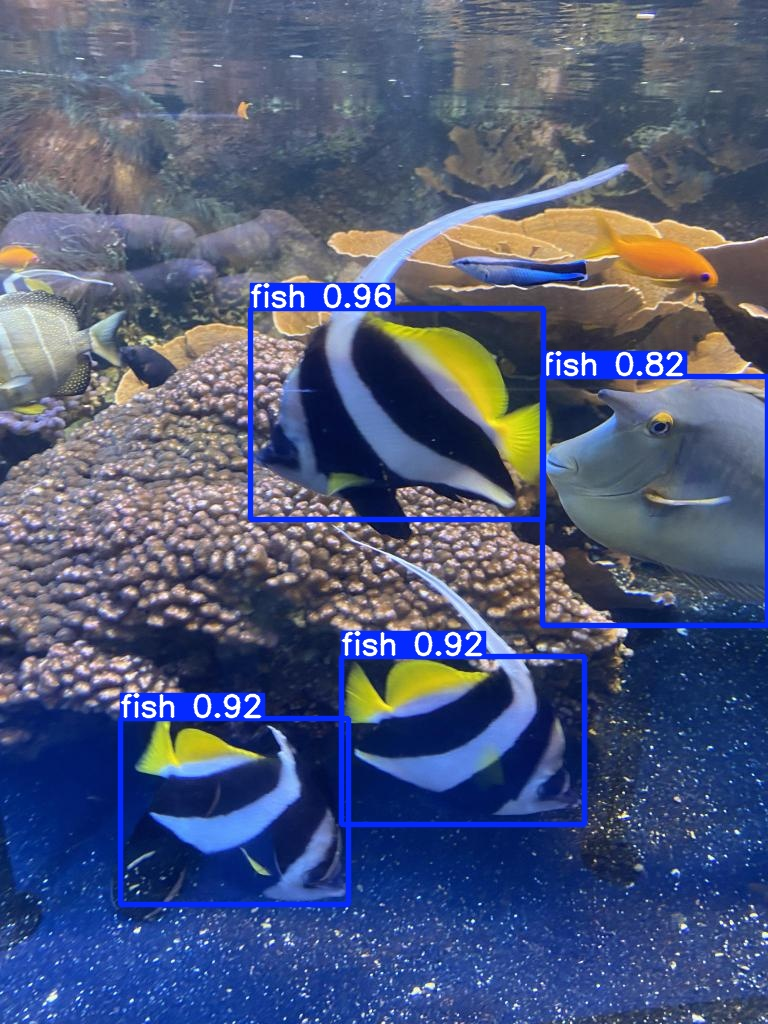

In [ ]:
from IPython.display import Image, display

# Tahmin edilen görüntü yolu
predicted_image_path = 'runs/detect/predict2/IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg'


display(Image(filename=predicted_image_path))


In [ ]:
import os

# Eğitim sonuç klasörlerini listele
train_folders = [folder for folder in os.listdir('runs/detect') if 'train' in folder]
print("Eğitim klasörleri:", train_folders)

# En son eğitim klasörünü seç
latest_train_folder = os.path.join('runs/detect', sorted(train_folders)[-1])
print("Son eğitim klasörü:", latest_train_folder)


Eğitim klasörleri: ['train', 'train5', 'train6', 'train7', 'train4', 'train3', 'train2']
Son eğitim klasörü: runs/detect/train7


In [ ]:
import pandas as pd
import os

# Sonuç dosyasının yolu
results_csv_path = os.path.join(latest_train_folder, 'results.csv')

# CSV dosyasını oku
if os.path.exists(results_csv_path):
    results_df = pd.read_csv(results_csv_path)
    print("Eğitim Sonuçları:")
    print(results_df)
else:
    print(f"Sonuç dosyası bulunamadı: {results_csv_path}")


Eğitim Sonuçları:
     epoch       time  train/box_loss  train/cls_loss  train/dfl_loss  \
0        1    11.7722         1.56843         3.87554         1.30681   
1        2    17.6808         1.61055         2.66767         1.26059   
2        3    23.5207         1.61110         2.25308         1.28026   
3        4    29.1422         1.55999         2.04689         1.25603   
4        5    34.7939         1.58063         1.98214         1.25806   
..     ...        ...             ...             ...             ...   
295    296  1686.2900         0.70429         0.41926         0.88342   
296    297  1691.9800         0.69433         0.41335         0.87544   
297    298  1697.5900         0.69293         0.40883         0.87521   
298    299  1703.3200         0.69116         0.41268         0.87979   
299    300  1708.9800         0.70088         0.41241         0.87719   

     metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                 0.01055            0.

In [ ]:
# CSV dosyasının sütun adlarını ve ilk birkaç satırını kontrol et
print("Sütunlar:", results_df.columns)
print("İlk birkaç satır:")
print(results_df.head())


Sütunlar: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
İlk birkaç satır:
   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  11.7722         1.56843         3.87554         1.30681   
1      2  17.6808         1.61055         2.66767         1.26059   
2      3  23.5207         1.61110         2.25308         1.28026   
3      4  29.1422         1.55999         2.04689         1.25603   
4      5  34.7939         1.58063         1.98214         1.25806   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.01055            0.40196           0.05654   
1               0.33897            0.05894           0.19436   
2               0.36229            0.29919           0.29679   
3            

In [ ]:
# Son epoch'un verilerini al
last_epoch_results = results_df.iloc[-1]

# Sonuçları yazdır
print("Son Epoch Sonuçları:")
print(f"mAP@0.5: {last_epoch_results['metrics/mAP50(B)']}")
print(f"mAP@0.5:0.95: {last_epoch_results['metrics/mAP50-95(B)']}")
print(f"Precision: {last_epoch_results['metrics/precision(B)']}")
print(f"Recall: {last_epoch_results['metrics/recall(B)']}")


Son Epoch Sonuçları:
mAP@0.5: 0.74522
mAP@0.5:0.95: 0.45874
Precision: 0.78873
Recall: 0.7132


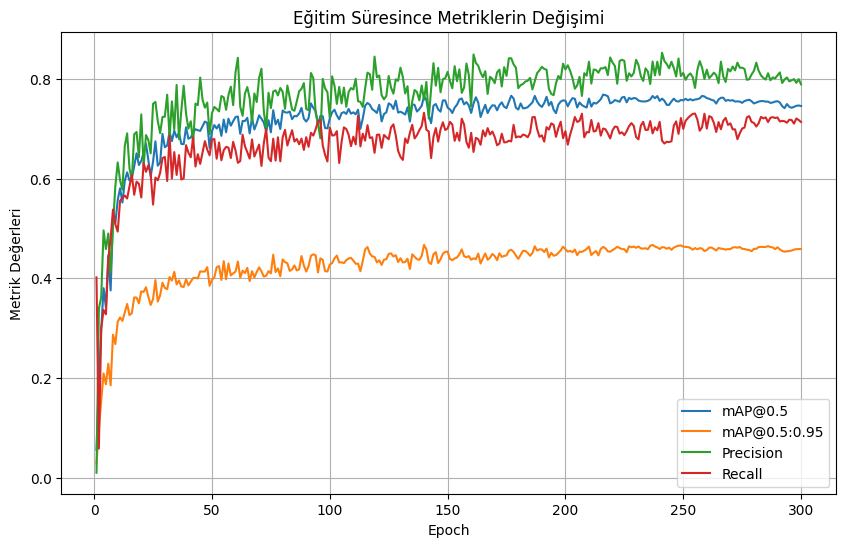

In [ ]:
import matplotlib.pyplot as plt

# Epoch ve mAP değerlerini çizdir
plt.figure(figsize=(10, 6))
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.plot(results_df['epoch'], results_df['metrics/precision(B)'], label='Precision')
plt.plot(results_df['epoch'], results_df['metrics/recall(B)'], label='Recall')

# Grafik detayları
plt.xlabel('Epoch')
plt.ylabel('Metrik Değerleri')
plt.title('Eğitim Süresince Metriklerin Değişimi')
plt.legend()
plt.grid()
plt.show()


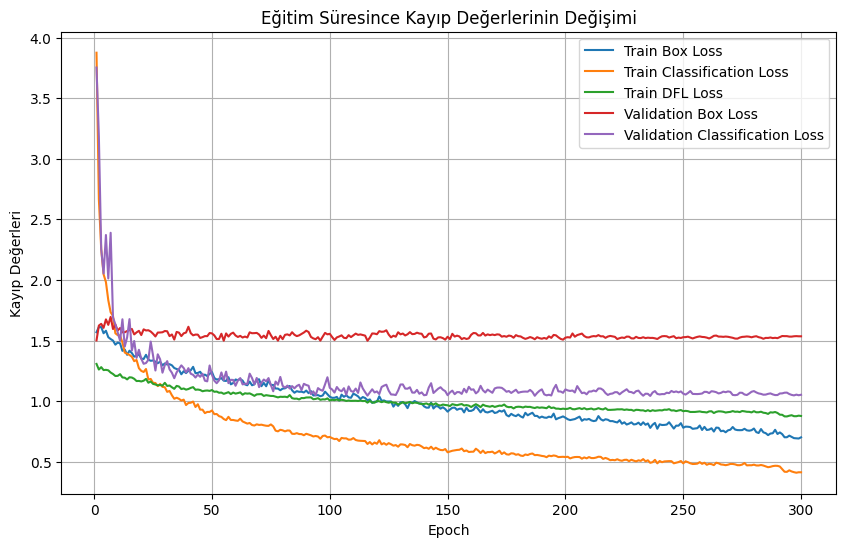

In [ ]:
# Epoch ve kayıp değerlerini çizdir
plt.figure(figsize=(10, 6))
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='Train Box Loss')
plt.plot(results_df['epoch'], results_df['train/cls_loss'], label='Train Classification Loss')
plt.plot(results_df['epoch'], results_df['train/dfl_loss'], label='Train DFL Loss')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='Validation Box Loss')
plt.plot(results_df['epoch'], results_df['val/cls_loss'], label='Validation Classification Loss')

# Grafik detayları
plt.xlabel('Epoch')
plt.ylabel('Kayıp Değerleri')
plt.title('Eğitim Süresince Kayıp Değerlerinin Değişimi')
plt.legend()
plt.grid()
plt.show()
